#**THE SPARKS FOUNDATION - GRIPJULY21**

##**TASK 1 - PREDICTION USING SUPERVISED ML**

###**AUTHOR: SANJAY R**

###**Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt


###**Downloading the Dataset**

Importing the csv data through pandas from online.
To check if it has been imported correctly I try printing the first few lines of the data.

In [4]:
data=pd.read_csv('http://bit.ly/w-data')
data.head(5);

The data has been imported perfectly. Now I would like to understand the data. To summarize I use the shape, describe and info functions.

In [7]:
data.shape


(25, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Since there is no null values I can proceed and find the statistics of the given data.

In [9]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now I'm proceeding to the visualization part.

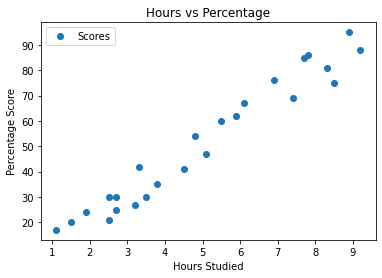

In [11]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

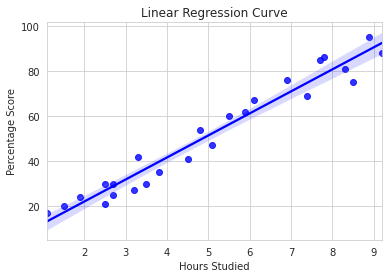

In [13]:
sns.set_style('whitegrid')
sns.regplot(x=data['Hours'],y=data['Scores'],color="blue")
plt.title("Linear Regression Curve")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph we can come to an conclusion thatthe positive linear line denotes that hours studied determines our percentage.

Now let us find the correlation between the attribute

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Now lets split the dataset into training and test data

In [15]:
x=data['Hours'].values.reshape(-1,1)
y=data['Scores'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

Now lets train the data

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
print("TRAINING DONE")

TRAINING DONE


Now lets make some predictions

In [17]:
y_pred=reg.predict(x_test)
print("Predictions Output")
print(y_pred)

Predictions Output
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


Now we have got the predicted data for the test data set. So lets compare the the predicted and actual data given.


In [21]:
data=pd.DataFrame({'Hours':x_test.reshape(1,-1)[0],'Actual':y_test.reshape(1,-1)[0],'Predicted':y_pred.reshape(1,-1)[0]})
data

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


Now lets calculate the accuracy of the model

In [22]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.183859899002982


Since the value of Mean Absolute Error is small, there is very less chance of error possibility

Now lets check what will be the predicted score if the student prepares for 9.25 hours per day ?

In [23]:
result=reg.predict([[9.25]])
print (result)

[[93.69173249]]


According to the trained model, if a student studies for 9.25 hours/day then he will be scoring 93.69%